## Tools

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Dataset

In [2]:
df = pd.read_csv("Dry_Bean_Dataset.csv")
df = df.replace(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'], [0, 1, 2, 3, 4, 5, 6])
df = df.sample(frac=1, random_state=41).reset_index()
df

,index,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,5116,81676,1102.785,427.143993,245.508328,1.739835,0.818317,83192,322.479632,0.752580,0.981777,0.843961,0.754967,0.005230,0.001048,0.569975,0.991663,3
1,2051,48638,874.666,303.607016,204.656324,1.483497,0.738656,49543,248.853019,0.776866,0.981733,0.798916,0.819655,0.006242,0.001738,0.671834,0.996664,1
2,10614,27084,606.300,224.705259,153.723318,1.461751,0.729378,27413,185.699811,0.710363,0.987998,0.925865,0.826415,0.008297,0.002387,0.682962,0.998320,6
3,10819,27980,613.770,220.763272,161.972863,1.362965,0.679479,28333,188.746503,0.818559,0.987541,0.933354,0.854972,0.007890,0.002601,0.730978,0.996297,6
4,2288,61320,971.046,339.151600,230.959020,1.468449,0.732292,62409,279.419128,0.770739,0.982551,0.817208,0.823877,0.005531,0.001572,0.678773,0.996744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,5200,83469,1105.279,420.016884,255.473201,1.644074,0.793749,85238,326.000048,0.698503,0.979246,0.858601,0.776159,0.005032,0.001126,0.602423,0.990429,3
13607,4066,65488,984.521,384.497431,218.905478,1.756454,0.822110,66604,288.759262,0.790861,0.983244,0.849027,0.751004,0.005871,0.001152,0.564008,0.990653,3
13608,12172,33221,672.871,249.406872,169.896424,1.467994,0.732096,33567,205.665483,0.761112,0.989692,0.922059,0.824618,0.007508,0.002141,0.679995,0.998229,6
13609,931,38802,707.093,245.751491,201.239549,1.221189,0.573973,39092,222.270648,0.791958,0.992582,0.975239,0.904453,0.006333,0.002614,0.818035,0.998975,0


## Preprocessing (Standardization)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
beans1=df.loc[:, df.columns != 'Class']
scaler.fit(beans1)
new_beans=pd.DataFrame(scaler.transform(beans1))
data = new_beans.set_axis(beans1.columns, axis=1, inplace=False)
data['Class']=df['Class']
data

,index,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.429863,0.976288,1.155028,1.248697,0.961510,0.634830,0.732862,0.988244,1.173054,0.058006,-1.151397,-0.492632,-0.727528,-1.182556,-1.120952,-0.743642,-0.778795,3
1,-1.209929,-0.150403,0.090454,-0.192959,0.053051,-0.404368,-0.133038,-0.141910,-0.071165,0.552776,-1.160850,-1.249475,0.320709,-0.284968,0.036947,0.285316,0.366645,1
2,0.969419,-0.885457,-1.161944,-1.113729,-1.079588,-0.492524,-0.233884,-0.885180,-1.138394,-0.802086,0.183587,0.883483,0.430252,1.536404,1.126396,0.397724,0.745957,6
3,1.021593,-0.854901,-1.127083,-1.159731,-0.896136,-0.893007,-0.776272,-0.854281,-1.086908,1.402206,0.085444,1.009311,0.893010,1.175958,1.484619,0.882770,0.282508,6
4,-1.149610,0.282089,0.540235,0.221840,0.637965,-0.465371,-0.202207,0.290215,0.445373,0.427961,-0.985417,-0.942144,0.389121,-0.915603,-0.241776,0.355408,0.384837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.408485,1.037435,1.166667,1.165525,1.183107,0.246614,0.465816,1.056962,1.232546,-1.043707,-1.694452,-0.246668,-0.384117,-1.357852,-0.989277,-0.415858,-1.061444,3
13607,-0.697096,0.424230,0.603119,0.751019,0.369921,0.702204,0.774089,0.431110,0.603212,0.837896,-0.836571,-0.407519,-0.791741,-0.613803,-0.946325,-0.803925,-1.009968,3
13608,1.365942,-0.676168,-0.851274,-0.825466,-0.719934,-0.467218,-0.204344,-0.678489,-0.800993,0.231821,0.547060,0.819549,0.401137,0.836821,0.713937,0.367758,0.725020,6
13609,-1.494977,-0.485840,-0.691568,-0.868123,-0.022931,-1.467767,-1.923097,-0.492923,-0.520382,0.860262,1.167064,1.713050,1.694817,-0.204027,1.507778,1.762203,0.895942,0


## Check independence between features

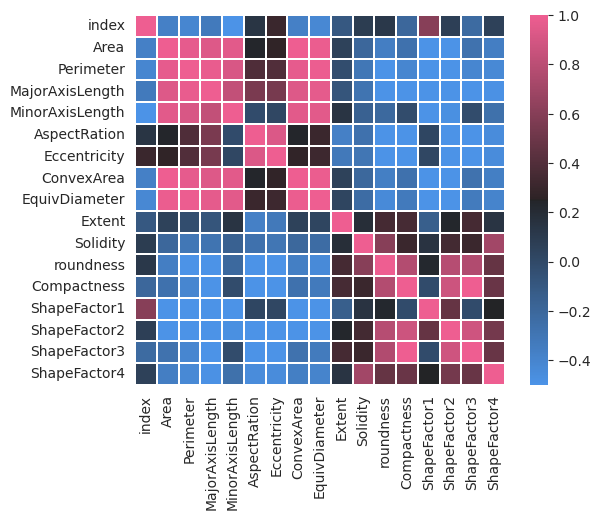

In [4]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)
plt.show()

## Analysis of The Drop of Independent Features

In [7]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from NaiveBayes import naive_bayes
import time

timing=[]
acc = []
pre = []
rec = []
fsc = []

dependent_variables = ['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Compactness', 'ShapeFactor2']

data1 = data

for i in range(len(dependent_variables)):

    print(f"Iteration {i}")
    start_time = time.time()

    data1 = data1.drop(dependent_variables[i], axis=1)

    train, test = train_test_split(data, test_size=.2, random_state=41)

    X_train = train.iloc[:,:-1]
    y_train = train.iloc[:,-1]
    X_test = test.iloc[:,:-1].values
    y_test = test.iloc[:,-1].values 

    y_pred = naive_bayes(train, X_Test=X_test, Y="Class", types='gaussian')

    acc.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred, average='weighted'))
    rec.append(recall_score(y_test, y_pred, average='weighted'))
    fsc.append(f1_score(y_test, y_pred, average='weighted'))        
    
    timing.append(time.time() - start_time)

print(timing)

Iteration 0


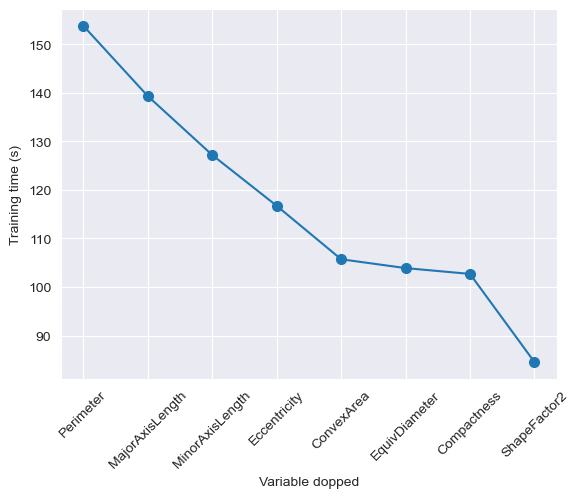

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig = plt.gcf()
id = ['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Compactness', 'ShapeFactor2']
plt.plot(id, timing, marker='o', markersize=7)
plt.xlabel('Variable dopped')
plt.ylabel('Training time (s)')
plt.xticks(rotation = 45)

plt.show()
plt.draw()

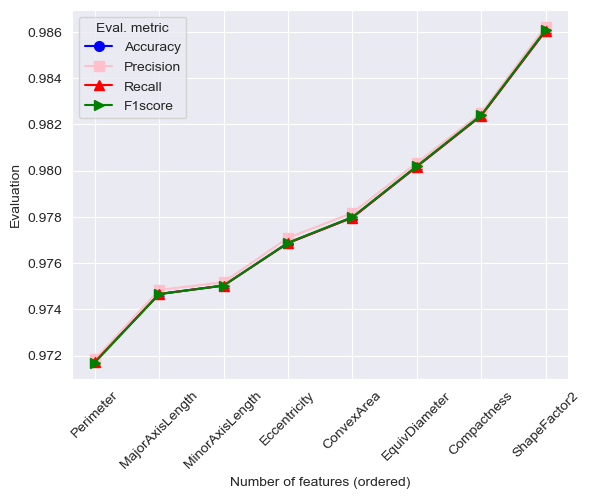

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig = plt.gcf()

plt.plot(id, acc, marker='o', markersize=7, color='Blue', label='Accuracy')
plt.plot(id, pre, marker='s', markersize=7,  color='Pink', label='Precision')
plt.plot(id, rec, marker='^', markersize=7, color='Red', label='Recall')
plt.plot(id, fsc, marker='>', markersize=7, color='Green', label='F1score')

plt.xlabel('Number of features (ordered)')

plt.xticks(rotation = 45)
plt.ylabel('Evaluation')

plt.legend(title='Eval. metric')
plt.show()
plt.draw()

## Drop non independent features

In [ ]:
data = data[["Area", "AspectRation", "Extent", "Solidity", "roundness", "ShapeFactor1", "ShapeFactor3", "ShapeFactor4", "Class"]]

# Dependent Variables: Perimeter, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Compactness, ShapeFactor2

data

,Area,AspectRation,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor3,ShapeFactor4,Class
0,0.976288,0.634830,0.058006,-1.151397,-0.492632,-1.182556,-0.743642,-0.778795,3
1,-0.150403,-0.404368,0.552776,-1.160850,-1.249475,-0.284968,0.285316,0.366645,1
2,-0.885457,-0.492524,-0.802086,0.183587,0.883483,1.536404,0.397724,0.745957,6
3,-0.854901,-0.893007,1.402206,0.085444,1.009311,1.175958,0.882770,0.282508,6
4,0.282089,-0.465371,0.427961,-0.985417,-0.942144,-0.915603,0.355408,0.384837,1
...,...,...,...,...,...,...,...,...,...
13606,1.037435,0.246614,-1.043707,-1.694452,-0.246668,-1.357852,-0.415858,-1.061444,3
13607,0.424230,0.702204,0.837896,-0.836571,-0.407519,-0.613803,-0.803925,-1.009968,3
13608,-0.676168,-0.467218,0.231821,0.547060,0.819549,0.836821,0.367758,0.725020,6
13609,-0.485840,-1.467767,0.860262,1.167064,1.713050,-0.204027,1.762203,0.895942,0


## Check indpendence once again

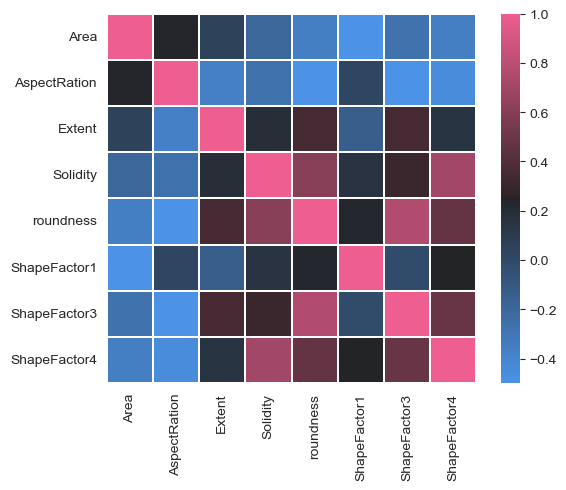

In [ ]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)
plt.show()

## Test Our Gaussian Model

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=.2, random_state=41)

X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

In [ ]:
import sys
import time
sys.path.insert(1, '../naive_bayes')

from NaiveBayes import naive_bayes

start_time = time.time()

Y_pred = naive_bayes(train, X_Test=X_test, Y="Class", types='gaussian')

total_time = time.time() - start_time

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print(confusion_matrix(y_test, Y_pred))
print(accuracy_score(y_test, Y_pred))
print(f1_score(y_test, Y_pred, average='weighted'))
print(recall_score(y_test, Y_pred, average='weighted'))
print(precision_score(y_test, Y_pred, average='weighted'))
print(total_time)

[[389  10   0   0   0   8   5]
 [  2 206   0  21   3  11   0]
 [  0   0  98   0   0   0   0]
 [  2  14   0 292  11   2   0]
 [  0   0   0   8 363   5   3]
 [ 11   1   0   3  16 490  36]
 [ 20   0   0   0   6  66 621]]
0.9030481087036357
0.9029812707448269
0.9030481087036357
0.9039914147992165
75.10456228256226


## Cross Validation of Our Model

In [ ]:
from NaiveBayes import CV

accuracy, recall, f1, precision = CV(data, 'Class', 10, False)

print(f"Accuracy {accuracy}")
print(f"Recall {recall}")
print(f"F1 {f1}")
print(f"Precision {precision}")

,index,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.429863,0.976288,1.155028,1.248697,0.961510,0.634830,0.732862,0.988244,1.173054,0.058006,-1.151397,-0.492632,-0.727528,-1.182556,-1.120952,-0.743642,-0.778795,3
1,-1.209929,-0.150403,0.090454,-0.192959,0.053051,-0.404368,-0.133038,-0.141910,-0.071165,0.552776,-1.160850,-1.249475,0.320709,-0.284968,0.036947,0.285316,0.366645,1
2,0.969419,-0.885457,-1.161944,-1.113729,-1.079588,-0.492524,-0.233884,-0.885180,-1.138394,-0.802086,0.183587,0.883483,0.430252,1.536404,1.126396,0.397724,0.745957,6
3,1.021593,-0.854901,-1.127083,-1.159731,-0.896136,-0.893007,-0.776272,-0.854281,-1.086908,1.402206,0.085444,1.009311,0.893010,1.175958,1.484619,0.882770,0.282508,6
4,-1.149610,0.282089,0.540235,0.221840,0.637965,-0.465371,-0.202207,0.290215,0.445373,0.427961,-0.985417,-0.942144,0.389121,-0.915603,-0.241776,0.355408,0.384837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.408485,1.037435,1.166667,1.165525,1.183107,0.246614,0.465816,1.056962,1.232546,-1.043707,-1.694452,-0.246668,-0.384117,-1.357852,-0.989277,-0.415858,-1.061444,3
13607,-0.697096,0.424230,0.603119,0.751019,0.369921,0.702204,0.774089,0.431110,0.603212,0.837896,-0.836571,-0.407519,-0.791741,-0.613803,-0.946325,-0.803925,-1.009968,3
13608,1.365942,-0.676168,-0.851274,-0.825466,-0.719934,-0.467218,-0.204344,-0.678489,-0.800993,0.231821,0.547060,0.819549,0.401137,0.836821,0.713937,0.367758,0.725020,6
13609,-1.494977,-0.485840,-0.691568,-0.868123,-0.022931,-1.467767,-1.923097,-0.492923,-0.520382,0.860262,1.167064,1.713050,1.694817,-0.204027,1.507778,1.762203,0.895942,0


## Comparison with SKLearn Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

start_time = time.time()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

total_time = time.time() - start_time

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y_test, y_pred_gnb))
print(accuracy_score(y_test, y_pred_gnb))
print(f1_score(y_test, y_pred_gnb, average='weighted'))
print(recall_score(y_test, Y_pred, average='weighted'))
print(precision_score(y_test, Y_pred, average='weighted'))
print(total_time)

[[389  10   0   0   0   8   5]
 [  2 206   0  21   3  11   0]
 [  0   0  98   0   0   0   0]
 [  2  14   0 292  11   2   0]
 [  0   0   0   8 363   5   3]
 [ 11   1   0   3  16 490  36]
 [ 20   0   0   0   6  66 621]]
0.9030481087036357
0.9029812707448269
0.9030481087036357
0.9039914147992165
0.016559123992919922


/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## Comparison with Logistic Regression

/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


-------- HOLD OUT --------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       412
           1       0.97      0.96      0.97       243
           2       1.00      1.00      1.00        98
           3       0.98      0.98      0.98       321
           4       0.98      0.98      0.98       379
           5       0.99      1.00      0.99       557
           6       1.00      1.00      1.00       713

    accuracy                           0.99      2723
   macro avg       0.99      0.99      0.99      2723
weighted avg       0.99      0.99      0.99      2723

0.9886154976129269
0.9886037373680027
0.9886154976129269
0.9886044299013015
0.385545015335083


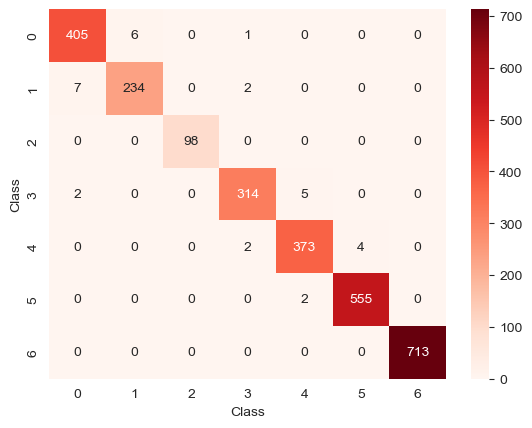

-------- CV --------


/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marcbosch/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

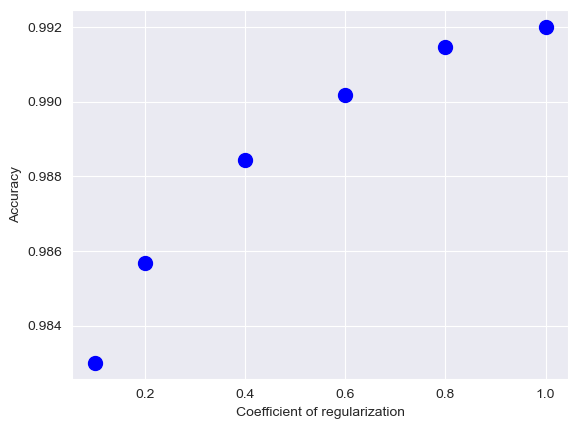

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()

start_time = time.time()

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

total_time = time.time() - start_time

print("-------- HOLD OUT --------")

#Evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average='weighted'))
print(total_time)

M = confusion_matrix(y_test, y_pred)

fig = plt.gcf()

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('Class')
plt.ylabel('Class')

plt.show()
plt.draw()
fig.savefig('CMtumorLR.png', dpi=100)


print("-------- CV --------")
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

a = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
b = ['balanced', 'imbalanced']
param_grid = dict(C=a, class_weight=b)

#clf = OneVsOneClassifier(LogisticRegression(verbose = True)).fit(X_train, y_train) 

clf = LogisticRegression()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['C','class_weight']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['Coefficient of regularization', 'Class weight', 'Accuracy']
grid_pivot = grid_reset.pivot('Coefficient of regularization', 'Class weight')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

fig = plt.gcf()

plt.plot(grid_reset['Coefficient of regularization'], grid_reset['Accuracy'], linestyle='dashed', color='Blue',marker='o', markersize=10)
plt.xlabel('Coefficient of regularization')
plt.ylabel('Accuracy')

plt.show()
plt.draw()